In [1]:
import jax
import jax.numpy as jnp
import time
import matplotlib.pyplot as plt
from functools import partial
from dataclasses import replace

from algorithms.ppo import create_ppo_train_object
from algorithms.ppo import PPOParams

env_name: str = ""
dpo_loss = False

In [2]:
def train_on_seed(
        seed: jax.dtypes.prng_key,
        lr: float = 2.5e-4,
        num_steps: int = 128
):
    config = {
        "seed": seed,
        "dpo_loss": dpo_loss,
        "learning_rate": lr,
        "num_steps": num_steps,
    }

    ppo_train_func = jax.jit(create_ppo_train_object(env_name, config), backend="gpu")
    out = ppo_train_func()
    returns = out["metrics"]["eval_rewards"]
    return returns

def train_on_seeds(lr=2.5e-4, num_steps=128, num_seeds: int = 16):
    rng = jax.random.PRNGKey(42)
    seeds = jax.random.split(rng, num_seeds + 1)
    returns = jax.vmap(train_on_seed, in_axes=(0, None, None))(seeds[1:], lr, num_steps)
    return returns.mean(axis=0)

lrs = jnp.array([2.5e-5, 2.5e-4, 2.5e-3, 2.5e-2, 2.5e-1])
# num_steps = jnp.array([8, 16, 32, 64, 128, 256, 512, 1024])


In [3]:
dpo_loss = False
env_name = "CartPole-v1"
returns = jax.vmap(train_on_seeds, in_axes=(0))(lrs)
for i in range(returns.shape[0]):
    plt.plot(returns[i], label=f"lr {i}")
plt.legend()

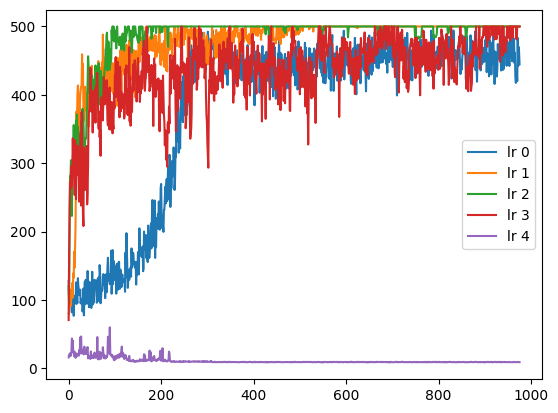

In [ ]:
dpo_loss = True
env_name = "CartPole-v1"
returns = jax.vmap(train_on_seeds, in_axes=(0))(lrs)
for i in range(returns.shape[0]):
    plt.plot(returns[i], label=f"lr {i}")
plt.legend()

In [ ]:
dpo_loss = False
env_name = "Acrobot-v1"
returns = jax.vmap(train_on_seeds, in_axes=(0))(lrs)
for i in range(returns.shape[0]):
    plt.plot(returns[i], label=f"lr {i}")
plt.legend()

In [ ]:
dpo_loss = True
env_name = "Acrobot-v1"
returns = jax.vmap(train_on_seeds, in_axes=(0))(lrs)
for i in range(returns.shape[0]):
    plt.plot(returns[i], label=f"lr {i}")
plt.legend()